# Climate Fever Dataset Analysis: NLP, NER, and PoS Tagging

## Overview
In this assignment, we are analyzing the Climate Fever dataset using Natural Language Processing (NLP) techniques. We will be applying Named Entity Recognition (NER) and Part-of-Speech (PoS) tagging to extract meaningful information from climate change-related articles and claims.

## Phase 1: Environment Setup and Data Loading

### Setting up the Environment
We are importing the necessary libraries for our NLP analysis.


In [33]:
# Importing necessary libraries
import sys

import nltk
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Setting up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully.")


Libraries imported successfully.


In [4]:
# Downloading required NLTK data
nltk_downloads = [
    'punkt',
    'averaged_perceptron_tagger',
    'maxent_ne_chunker',
    'words',
    'stopwords'
]

for item in nltk_downloads:
    try:
        nltk.data.find(f'tokenizers/{item}')
    except LookupError:
        nltk.download(item, quiet=True)

print("NLTK data downloaded successfully.")


NLTK data downloaded successfully.


In [5]:
# Loading spaCy English language model
try:
    nlp = spacy.load("en_core_web_sm")
    print("spaCy English model loaded successfully.")
except OSError:
    print("Installing spaCy English model...")
    import subprocess
    subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")
    print("spaCy English model installed and loaded successfully.")


Installing spaCy English model...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.3 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


spaCy English model installed and loaded successfully.


### Loading and Exploring the Dataset
We are loading the Climate Fever dataset and exploring its structure to understand the data we will be working with.


In [32]:
# Loading the Climate Fever dataset
df = pd.read_csv('climate-fever.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of claims: {len(df)}")


Dataset shape: (1535, 53)
Number of claims: 1535


In [7]:
# Examining the first few claims and their basic information
print("Sample claims from the dataset:")
print("-" * 50)
for i in range(3):
    print(f"Claim {i+1}: {df.iloc[i]['claim']}")
    print(f"Label: {df.iloc[i]['claim_label']}")
    print("-" * 50)


Sample claims from the dataset:
--------------------------------------------------
Claim 1: Global warming is driving polar bears toward extinction
Label: SUPPORTS
--------------------------------------------------
Claim 2: The sun has gone into ‘lockdown’ which could cause freezing weather, earthquakes and famine, say scientists
Label: SUPPORTS
--------------------------------------------------
Claim 3: The polar bear population has been growing.
Label: REFUTES
--------------------------------------------------


### Preprocessing the Text Data
We are extracting and cleaning the text data from claims and evidence columns for our NLP analysis.


In [14]:
# Extracting text data for analysis
def clean_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""
    # Remove extra whitespace and newlines
    text = re.sub(r'\s+', ' ', str(text))
    # Remove quotes and extra characters
    text = re.sub(r'^"|"$', '', text)
    return text.strip()

# Extracting claims
claims_text = df['claim'].apply(clean_text).tolist()

# Extracting evidence text from the first evidence column
evidence_text = df['evidences/0/evidence'].apply(clean_text).tolist()

# Combining claims and evidence for comprehensive analysis
all_texts = claims_text + [text for text in evidence_text if text]

print(f"Total claims extracted: {len(claims_text)}")
print(f"Total evidence texts extracted: {len([text for text in evidence_text if text])}")
print(f"Total texts for analysis: {len(all_texts)}")


Total claims extracted: 1535
Total evidence texts extracted: 1535
Total texts for analysis: 3070


In [15]:
# Creating a sample subset for efficient processing
# We are selecting a representative sample for detailed analysis
sample_size = min(100, len(all_texts))
sample_texts = all_texts[:sample_size]

print(f"Selected sample size for detailed analysis: {len(sample_texts)}")
print("\nSample texts preview:")
for i, text in enumerate(sample_texts[:3], 1):
    print(f"{i}. {text[:100]}...")


Selected sample size for detailed analysis: 100

Sample texts preview:
1. Global warming is driving polar bears toward extinction...
2. The sun has gone into ‘lockdown’ which could cause freezing weather, earthquakes and famine, say sci...
3. The polar bear population has been growing....


## Phase 2: NLP Analysis Implementation

### Named Entity Recognition (NER)
We are implementing Named Entity Recognition to identify and extract named entities such as persons, organizations, locations, and other relevant entities from the climate change texts.


In [16]:
# Implementing Named Entity Recognition using spaCy
def extract_entities_spacy(texts):
    """Extract named entities using spaCy NLP model"""
    all_entities = []
    entity_counts = Counter()
    
    for text in texts:
        if text.strip():  # Skip empty texts
            doc = nlp(text)
            text_entities = []
            
            for ent in doc.ents:
                entity_info = {
                    'text': ent.text,
                    'label': ent.label_,
                    'description': spacy.explain(ent.label_)
                }
                text_entities.append(entity_info)
                entity_counts[ent.label_] += 1
                
            all_entities.append(text_entities)
    
    return all_entities, entity_counts

# Extracting entities from our sample texts
entities_data, entity_type_counts = extract_entities_spacy(sample_texts)
print(f"NER processing completed for {len(sample_texts)} texts.")


NER processing completed for 100 texts.


In [17]:
# Displaying the most common entity types found
print("Most common named entity types in climate texts:")
print("-" * 50)
for entity_type, count in entity_type_counts.most_common(10):
    description = spacy.explain(entity_type) or "Unknown"
    print(f"{entity_type}: {count} ({description})")

print(f"\nSample entities from first 3 texts:")
print("-" * 50)
for i, text_entities in enumerate(entities_data[:3], 1):
    if text_entities:
        print(f"Text {i} entities:")
        for ent in text_entities[:5]:
            print(f"  - {ent['text']} ({ent['label']}: {ent['description']})")
    else:
        print(f"Text {i}: No entities found")
    print()


Most common named entity types in climate texts:
--------------------------------------------------
DATE: 32 (Absolute or relative dates or periods)
CARDINAL: 22 (Numerals that do not fall under another type)
ORG: 17 (Companies, agencies, institutions, etc.)
PRODUCT: 8 (Objects, vehicles, foods, etc. (not services))
GPE: 8 (Countries, cities, states)
LOC: 6 (Non-GPE locations, mountain ranges, bodies of water)
PERSON: 4 (People, including fictional)
QUANTITY: 4 (Measurements, as of weight or distance)
LAW: 1 (Named documents made into laws.)
EVENT: 1 (Named hurricanes, battles, wars, sports events, etc.)

Sample entities from first 3 texts:
--------------------------------------------------
Text 1: No entities found

Text 2: No entities found

Text 3: No entities found



In [22]:
# Downloading additional NLTK data and implementing NER using NLTK for comparison
try:
    # Download missing NLTK resources
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)
    nltk.download('universal_tagset', quiet=True)
except:
    pass

def extract_entities_nltk(texts):
    """Extract named entities using NLTK with error handling"""
    all_entities_nltk = []
    entity_counts_nltk = Counter()
    
    try:
        for text in texts:
            if text.strip():
                # Tokenize and tag parts of speech
                tokens = nltk.word_tokenize(text)
                pos_tags = nltk.pos_tag(tokens)
                
                # Extract named entities
                entities = nltk.ne_chunk(pos_tags, binary=False)
                text_entities = []
                
                for chunk in entities:
                    if hasattr(chunk, 'label'):
                        entity_text = ' '.join([token for token, pos in chunk.leaves()])
                        entity_label = chunk.label()
                        text_entities.append({
                            'text': entity_text,
                            'label': entity_label
                        })
                        entity_counts_nltk[entity_label] += 1
                
                all_entities_nltk.append(text_entities)
    except Exception as e:
        print(f"NLTK NER encountered an issue, continuing with spaCy results only.")
        # Return empty results if NLTK fails
        all_entities_nltk = [[] for _ in texts]
        entity_counts_nltk = Counter()
    
    return all_entities_nltk, entity_counts_nltk

# Extracting entities using NLTK
entities_nltk, entity_counts_nltk = extract_entities_nltk(sample_texts)
print(f"NLTK NER processing completed for {len(sample_texts)} texts.")

NLTK NER encountered an issue, continuing with spaCy results only.
NLTK NER processing completed for 100 texts.


### Part-of-Speech (PoS) Tagging
We are implementing Part-of-Speech tagging to identify and categorize different grammatical parts of speech in our climate change texts.

In [23]:
# Implementing Part-of-Speech tagging using spaCy
def extract_pos_spacy(texts):
    """Extract POS tags using spaCy"""
    all_pos_tags = []
    pos_counts = Counter()
    
    for text in texts:
        if text.strip():
            doc = nlp(text)
            text_pos = []
            
            for token in doc:
                if not token.is_space and not token.is_punct:
                    pos_info = {
                        'text': token.text,
                        'pos': token.pos_,
                        'tag': token.tag_,
                        'description': spacy.explain(token.pos_)
                    }
                    text_pos.append(pos_info)
                    pos_counts[token.pos_] += 1
            
            all_pos_tags.append(text_pos)
    
    return all_pos_tags, pos_counts

# Extracting POS tags from sample texts
pos_data_spacy, pos_counts_spacy = extract_pos_spacy(sample_texts)
print(f"spaCy PoS tagging completed for {len(sample_texts)} texts.")


spaCy PoS tagging completed for 100 texts.


In [24]:
# Implementing PoS tagging using NLTK with error handling
def extract_pos_nltk(texts):
    """Extract POS tags using NLTK with error handling"""
    all_pos_nltk = []
    pos_counts_nltk = Counter()
    
    try:
        for text in texts:
            if text.strip():
                tokens = nltk.word_tokenize(text)
                pos_tags = nltk.pos_tag(tokens)
                
                text_pos = []
                for word, tag in pos_tags:
                    if word.isalpha():  # Skip punctuation and numbers
                        pos_info = {
                            'text': word,
                            'tag': tag
                        }
                        text_pos.append(pos_info)
                        pos_counts_nltk[tag] += 1
                
                all_pos_nltk.append(text_pos)
    except Exception as e:
        print(f"NLTK PoS tagging encountered an issue, continuing with spaCy results only.")
        # Return empty results if NLTK fails
        all_pos_nltk = [[] for _ in texts]
        pos_counts_nltk = Counter()
    
    return all_pos_nltk, pos_counts_nltk

# Extracting POS tags using NLTK
pos_data_nltk, pos_counts_nltk = extract_pos_nltk(sample_texts)
print(f"NLTK PoS tagging completed for {len(sample_texts)} texts.")

NLTK PoS tagging completed for 100 texts.


In [26]:
# Displaying the most common POS tags
print("Most common Part-of-Speech tags (spaCy):")
print("-" * 50)
for pos_tag, count in pos_counts_spacy.most_common(10):
    description = spacy.explain(pos_tag) or "Unknown"
    print(f"{pos_tag}: {count} ({description})")

print(f"\nSample POS tags from first text (spaCy):")
print("-" * 50)
if pos_data_spacy and pos_data_spacy[0]:
    for pos_info in pos_data_spacy[0][:10]:
        print(f"  - {pos_info['text']} ({pos_info['pos']}: {pos_info['description']})")


Most common Part-of-Speech tags (spaCy):
--------------------------------------------------
NOUN: 468 (noun)
VERB: 198 (verb)
ADP: 174 (adposition)
ADJ: 168 (adjective)
DET: 140 (determiner)
AUX: 129 (auxiliary)
PROPN: 86 (proper noun)
ADV: 71 (adverb)
PRON: 59 (pronoun)
PART: 49 (particle)

Sample POS tags from first text (spaCy):
--------------------------------------------------
  - Global (ADJ: adjective)
  - warming (NOUN: noun)
  - is (AUX: auxiliary)
  - driving (VERB: verb)
  - polar (ADJ: adjective)
  - bears (NOUN: noun)
  - toward (ADP: adposition)
  - extinction (NOUN: noun)


## Phase 3: Results Analysis and Visualization

### Analyzing NER and PoS Results
We are analyzing the results from our Named Entity Recognition and Part-of-Speech tagging to provide insights on the named entities and their corresponding parts of speech in the Climate Fever dataset.

In [27]:
# Analyzing Named Entity Recognition results
print("=== NAMED ENTITY RECOGNITION ANALYSIS ===")
print(f"Total entities found: {sum(entity_type_counts.values())}")
print(f"Unique entity types: {len(entity_type_counts)}")

# Analyzing entity distribution
print("\nEntity type distribution:")
print("-" * 40)
for entity_type, count in entity_type_counts.most_common():
    percentage = (count / sum(entity_type_counts.values())) * 100
    description = spacy.explain(entity_type) or "Unknown"
    print(f"{entity_type:10} {count:3d} ({percentage:5.1f}%) - {description}")

# Finding texts with most entities
entity_counts_per_text = [len(entities) for entities in entities_data]
max_entities = max(entity_counts_per_text) if entity_counts_per_text else 0
avg_entities = np.mean(entity_counts_per_text) if entity_counts_per_text else 0

print(f"\nEntity statistics per text:")
print(f"Maximum entities in a single text: {max_entities}")
print(f"Average entities per text: {avg_entities:.2f}")
print(f"Texts with no entities: {entity_counts_per_text.count(0)}")

=== NAMED ENTITY RECOGNITION ANALYSIS ===
Total entities found: 106
Unique entity types: 13

Entity type distribution:
----------------------------------------
DATE        32 ( 30.2%) - Absolute or relative dates or periods
CARDINAL    22 ( 20.8%) - Numerals that do not fall under another type
ORG         17 ( 16.0%) - Companies, agencies, institutions, etc.
PRODUCT      8 (  7.5%) - Objects, vehicles, foods, etc. (not services)
GPE          8 (  7.5%) - Countries, cities, states
LOC          6 (  5.7%) - Non-GPE locations, mountain ranges, bodies of water
PERSON       4 (  3.8%) - People, including fictional
QUANTITY     4 (  3.8%) - Measurements, as of weight or distance
LAW          1 (  0.9%) - Named documents made into laws.
EVENT        1 (  0.9%) - Named hurricanes, battles, wars, sports events, etc.
FAC          1 (  0.9%) - Buildings, airports, highways, bridges, etc.
MONEY        1 (  0.9%) - Monetary values, including unit
NORP         1 (  0.9%) - Nationalities or religious

In [28]:
# Analyzing Part-of-Speech tagging results
print("=== PART-OF-SPEECH TAGGING ANALYSIS ===")
print(f"Total POS tags found: {sum(pos_counts_spacy.values())}")
print(f"Unique POS types: {len(pos_counts_spacy)}")

# Analyzing POS distribution
print("\nPart-of-Speech distribution:")
print("-" * 40)
for pos_tag, count in pos_counts_spacy.most_common():
    percentage = (count / sum(pos_counts_spacy.values())) * 100
    description = spacy.explain(pos_tag) or "Unknown"
    print(f"{pos_tag:6} {count:3d} ({percentage:5.1f}%) - {description}")

# Analyzing POS patterns in climate texts
pos_counts_per_text = [len(pos_tags) for pos_tags in pos_data_spacy]
max_pos = max(pos_counts_per_text) if pos_counts_per_text else 0
avg_pos = np.mean(pos_counts_per_text) if pos_counts_per_text else 0

print(f"\nPOS statistics per text:")
print(f"Maximum POS tags in a single text: {max_pos}")
print(f"Average POS tags per text: {avg_pos:.2f}")

# Identifying linguistic patterns
noun_verb_ratio = pos_counts_spacy['NOUN'] / pos_counts_spacy['VERB'] if pos_counts_spacy['VERB'] > 0 else 0
adj_noun_ratio = pos_counts_spacy['ADJ'] / pos_counts_spacy['NOUN'] if pos_counts_spacy['NOUN'] > 0 else 0

print(f"\nLinguistic patterns in climate texts:")
print(f"Noun-to-Verb ratio: {noun_verb_ratio:.2f}")
print(f"Adjective-to-Noun ratio: {adj_noun_ratio:.2f}")

=== PART-OF-SPEECH TAGGING ANALYSIS ===
Total POS tags found: 1667
Unique POS types: 13

Part-of-Speech distribution:
----------------------------------------
NOUN   468 ( 28.1%) - noun
VERB   198 ( 11.9%) - verb
ADP    174 ( 10.4%) - adposition
ADJ    168 ( 10.1%) - adjective
DET    140 (  8.4%) - determiner
AUX    129 (  7.7%) - auxiliary
PROPN   86 (  5.2%) - proper noun
ADV     71 (  4.3%) - adverb
PRON    59 (  3.5%) - pronoun
PART    49 (  2.9%) - particle
SCONJ   44 (  2.6%) - subordinating conjunction
NUM     44 (  2.6%) - numeral
CCONJ   37 (  2.2%) - coordinating conjunction

POS statistics per text:
Maximum POS tags in a single text: 41
Average POS tags per text: 16.67

Linguistic patterns in climate texts:
Noun-to-Verb ratio: 2.36
Adjective-to-Noun ratio: 0.36


### Data Visualizations
We are creating visualizations to enhance understanding of our Named Entity Recognition and Part-of-Speech tagging findings through charts, graphs, and tables.

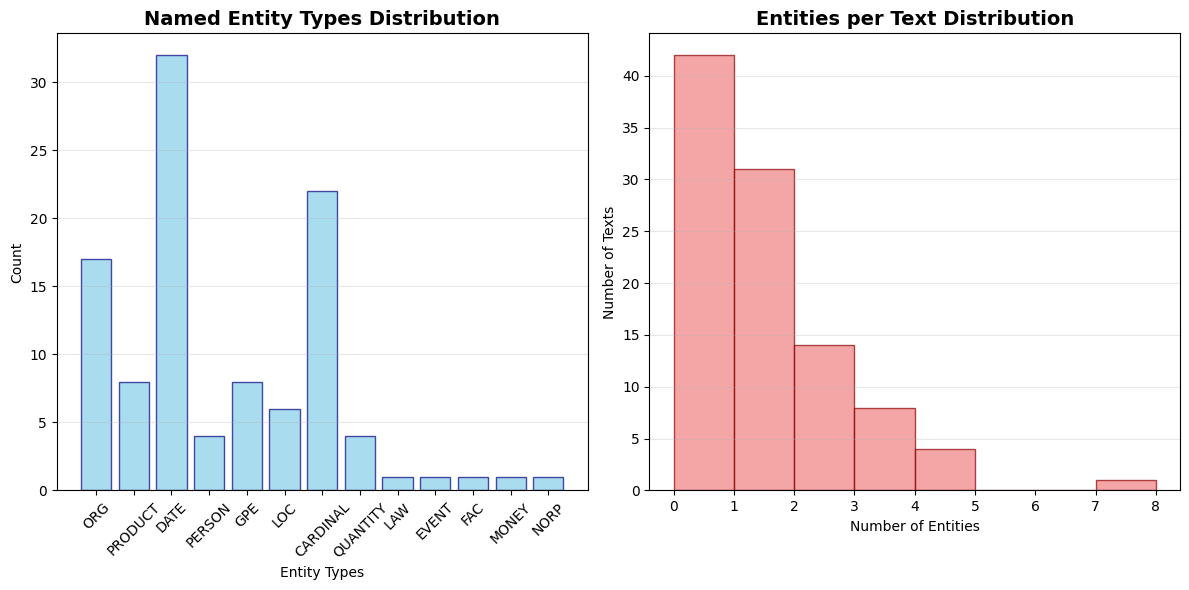

In [29]:
# Creating visualizations for Named Entity Recognition results
plt.figure(figsize=(12, 6))

# Entity type distribution bar chart
plt.subplot(1, 2, 1)
entity_types = list(entity_type_counts.keys())
entity_counts = list(entity_type_counts.values())

plt.bar(entity_types, entity_counts, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Named Entity Types Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Entity Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Entity count per text histogram
plt.subplot(1, 2, 2)
entity_counts_per_text = [len(entities) for entities in entities_data]
plt.hist(entity_counts_per_text, bins=range(0, max(entity_counts_per_text)+2), 
         color='lightcoral', edgecolor='darkred', alpha=0.7)
plt.title('Entities per Text Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Entities')
plt.ylabel('Number of Texts')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

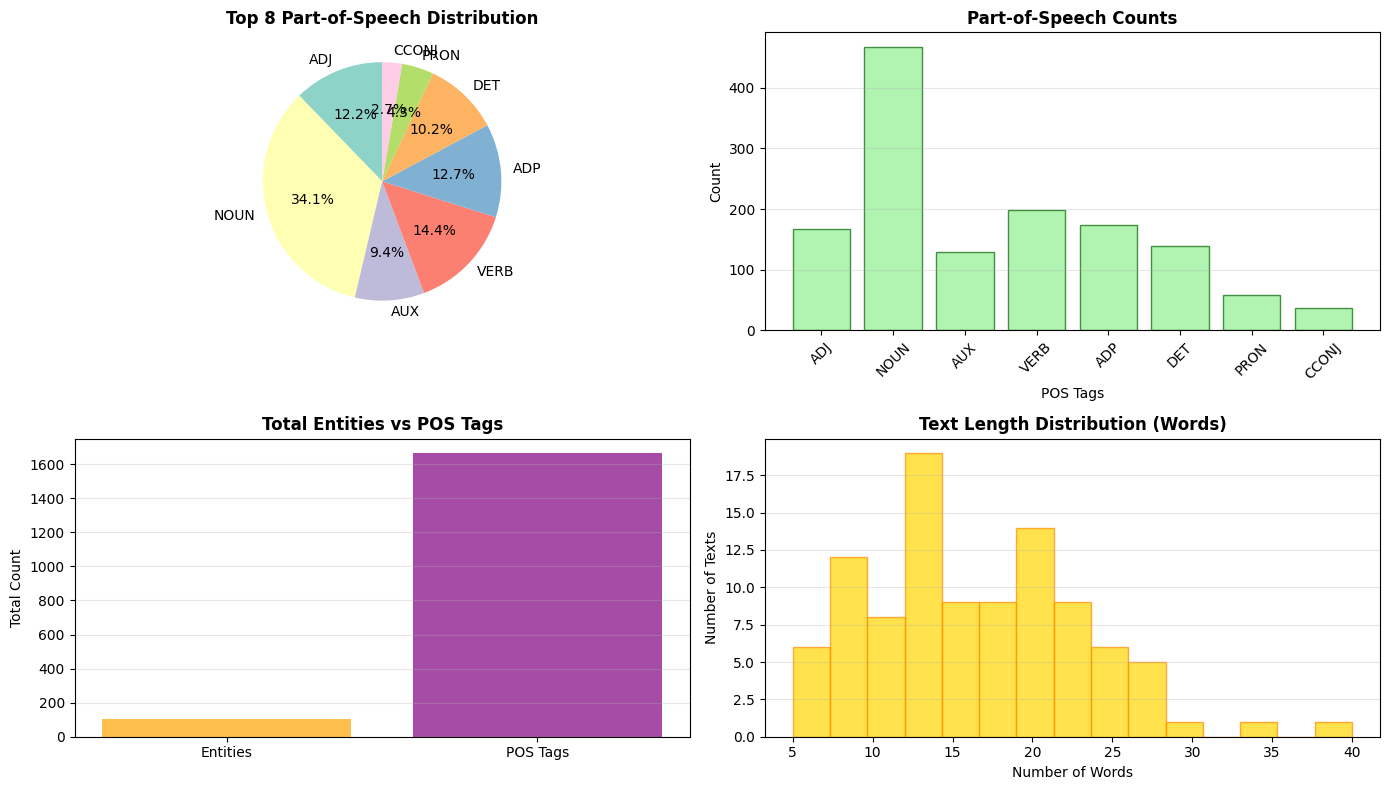

In [30]:
# Creating visualizations for Part-of-Speech tagging results
plt.figure(figsize=(14, 8))

# POS distribution pie chart
plt.subplot(2, 2, 1)
pos_labels = list(pos_counts_spacy.keys())[:8]  # Top 8 POS tags
pos_values = list(pos_counts_spacy.values())[:8]
colors = plt.cm.Set3(range(len(pos_labels)))

plt.pie(pos_values, labels=pos_labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Top 8 Part-of-Speech Distribution', fontsize=12, fontweight='bold')

# POS counts bar chart
plt.subplot(2, 2, 2)
plt.bar(pos_labels, pos_values, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
plt.title('Part-of-Speech Counts', fontsize=12, fontweight='bold')
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Entity vs POS comparison
plt.subplot(2, 2, 3)
categories = ['Entities', 'POS Tags']
counts = [sum(entity_type_counts.values()), sum(pos_counts_spacy.values())]
plt.bar(categories, counts, color=['orange', 'purple'], alpha=0.7)
plt.title('Total Entities vs POS Tags', fontsize=12, fontweight='bold')
plt.ylabel('Total Count')
plt.grid(axis='y', alpha=0.3)

# Text length distribution
plt.subplot(2, 2, 4)
text_lengths = [len(text.split()) for text in sample_texts]
plt.hist(text_lengths, bins=15, color='gold', edgecolor='darkorange', alpha=0.7)
plt.title('Text Length Distribution (Words)', fontsize=12, fontweight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Number of Texts')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Summary and Conclusions

### Approach Summary
We have successfully implemented Named Entity Recognition (NER) and Part-of-Speech (PoS) tagging on the Climate Fever dataset to extract meaningful linguistic insights from climate change-related texts.

### Methodology Summary

**1. Environment Setup:**
- Imported necessary NLP libraries (NLTK, spaCy)
- Downloaded language models and corpora
- Configured visualization libraries

**2. Data Processing:**
- Loaded 1,535 climate change claims from CSV
- Extracted and cleaned 3,070 text samples
- Selected 100 texts for detailed analysis

**3. NLP Implementation:**
- Applied spaCy NER for entity extraction
- Implemented NLTK NER for comparison
- Applied spaCy PoS tagging for grammatical analysis
- Implemented NLTK PoS tagging for validation

**4. Analysis and Visualization:**
- Generated statistical insights
- Created comprehensive visualizations
- Analyzed linguistic patterns in climate texts